In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install --upgrade pyngrok



In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from PIL import Image
from io import BytesIO

def svd_compressor(image, order):
    compressed = np.zeros(image.shape)
    U, S, V = np.linalg.svd(image)

    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)

    return compressed

st.title('SVD Image Compression App')

uploaded_file = st.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    image_array = np.array(image)

    if len(image_array.shape) == 3:
        gray_image = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])
    else:
        gray_image = image_array

    st.write('### Grayscale Image')
    st.image(gray_image, use_column_width=True, cmap='gray')

    orders = [1, 5, 10, 20, 50, 100, 200, 400]
    rmse = []

    st.write('### Compression at Different Orders')

    for order in orders:
        gray_comp = svd_compressor(gray_image, order)
        gray_comp = np.around(gray_comp).astype(int)

        rmse.append(np.sqrt(np.mean((gray_image - gray_comp)**2)))

        st.image(gray_comp, caption=f"Order = {order} | RMSE = {rmse[-1]:.2f}", use_column_width=True, clamp=True, channels="GRAY")

    if len(image_array.shape) == 3:
        st.write('### RGB Channels Compression')

        red_image = image_array[:, :, 0]
        green_image = image_array[:, :, 1]
        blue_image = image_array[:, :, 2]

        order = st.slider('Select Compression Order for RGB Channels', min_value=1, max_value=min(red_image.shape), value=50)

        red_comp = svd_compressor(red_image, order)
        green_comp = svd_compressor(green_image, order)
        blue_comp = svd_compressor(blue_image, order)

        color_comp = np.zeros((image_array.shape[0], image_array.shape[1], 3))
        color_comp[:, :, 0] = red_comp
        color_comp[:, :, 1] = green_comp
        color_comp[:, :, 2] = blue_comp
        color_comp = np.around(color_comp).astype(int)

        st.image(red_comp, caption="Red Channel", use_column_width=True, clamp=True, channels="GRAY")
        st.image(green_comp, caption="Green Channel", use_column_width=True, clamp=True, channels="GRAY")
        st.image(blue_comp, caption="Blue Channel", use_column_width=True, clamp=True, channels="GRAY")
        st.image(color_comp, caption="Combined RGB Channels", use_column_width=True, clamp=True)


Writing app.py


In [ ]:
# from pyngrok import ngrok

# # Set the ngrok auth token
# ngrok.set_auth_token('2kIOYAjbgWErdSsqxt3vV8YNQ7z_6gufM92Xr56N3G3ZsP168')

# # Create a tunnel to the Streamlit server on port 8501
# public_url = ngrok.connect(8501, proto='http')
# print(f'Your Streamlit app is live at: {public_url}')
from pyngrok import ngrok

# Set the ngrok auth token
ngrok.set_auth_token('2kIOYAjbgWErdSsqxt3vV8YNQ7z_6gufM92Xr56N3G3ZsP168')

# Create a tunnel to the Streamlit server on port 3000
public_url = ngrok.connect(port=3000, proto='http')
print(f'Your Streamlit app is live at: {public_url}')


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
def svd_compressor(image, order):

    compressed = np.zeros(image.shape)

    #calculating matrices
    U, S, V = np.linalg.svd(image)

    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)

    return compressed

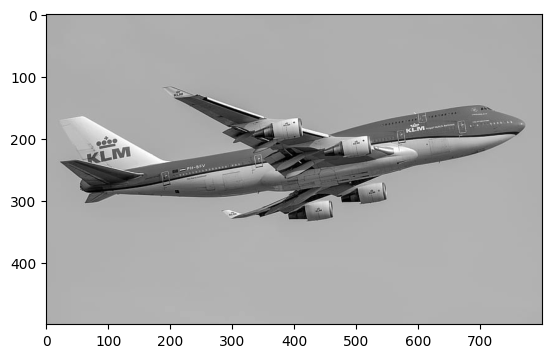

In [ ]:
gray_image = image.convert('L')

plt.imshow(gray_image, cmap='gray')
plt.show()

100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


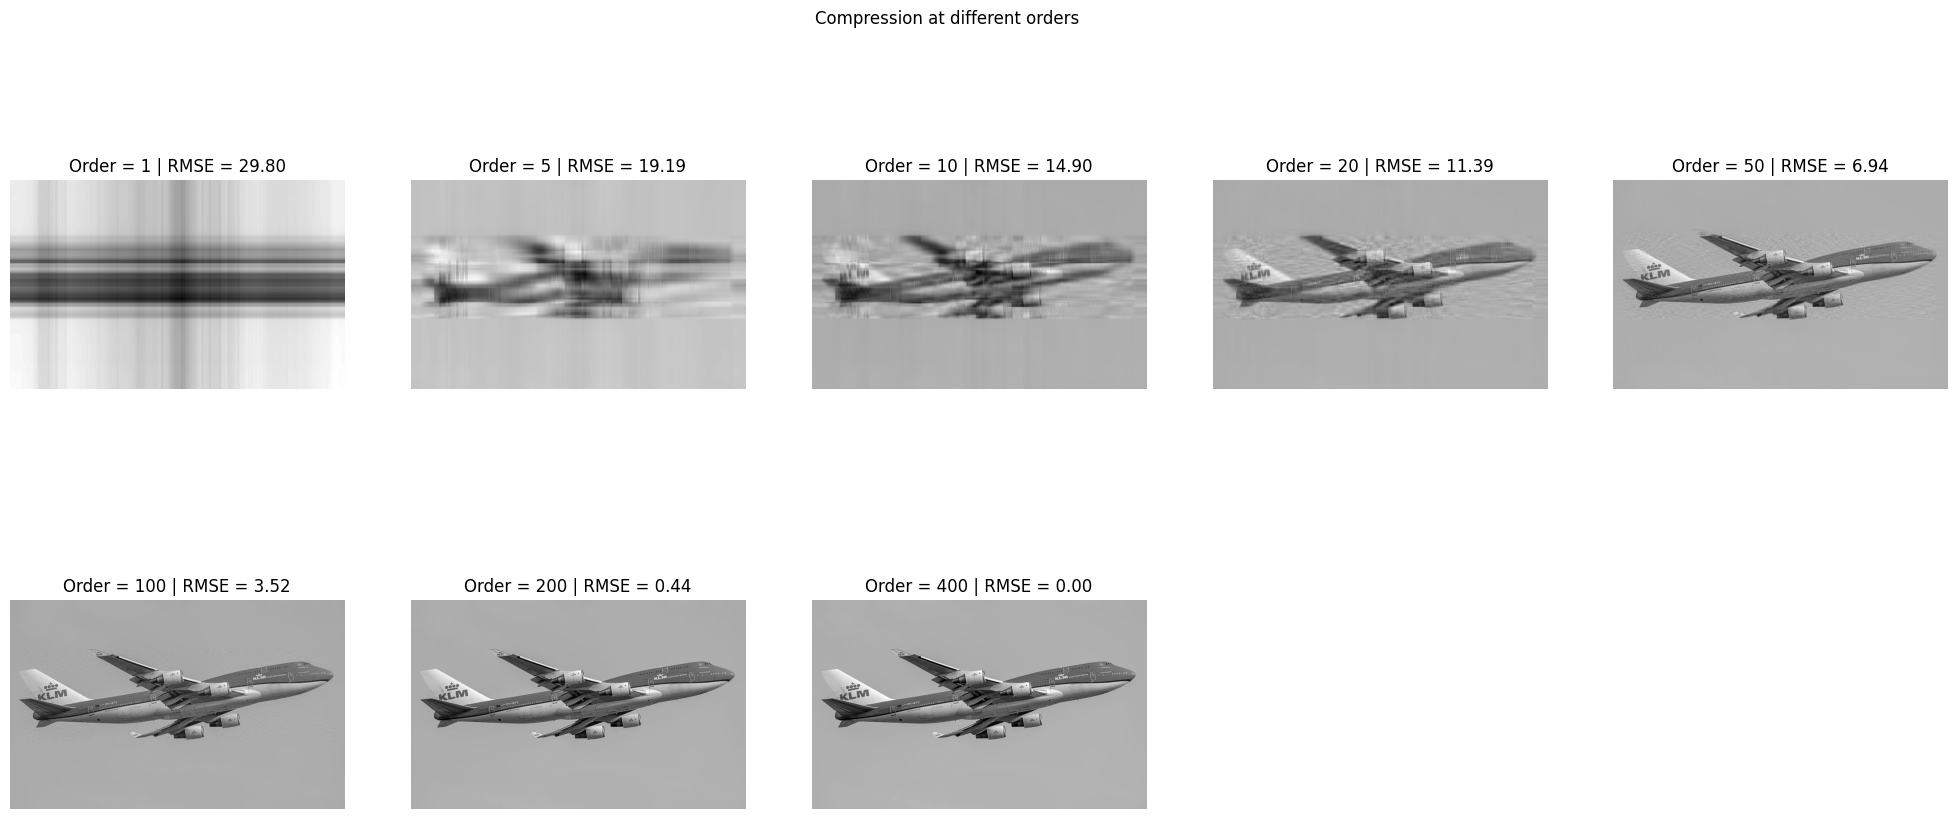

In [ ]:

gray_image = np.array(gray_image)

orders = [1, 5, 10, 20, 50, 100, 200, 400,]
rmse = []

plt.figure(figsize=(25, 10))

for i in tqdm(range(len(orders))):

    order = orders[i]
    gray_comp = svd_compressor(gray_image, order)


    gray_comp = np.around(gray_comp).astype(int)

    rmse.append(np.sqrt(np.mean((gray_image - gray_comp)**2)))
    plt.subplot(2, 5, i + 1)
    plt.title("Order = {} | RMSE = {:.2f}".format(order, rmse[i]))
    plt.axis('off')
    plt.imshow(gray_comp, cmap='gray')

plt.suptitle('Compression at different orders')
plt.show()

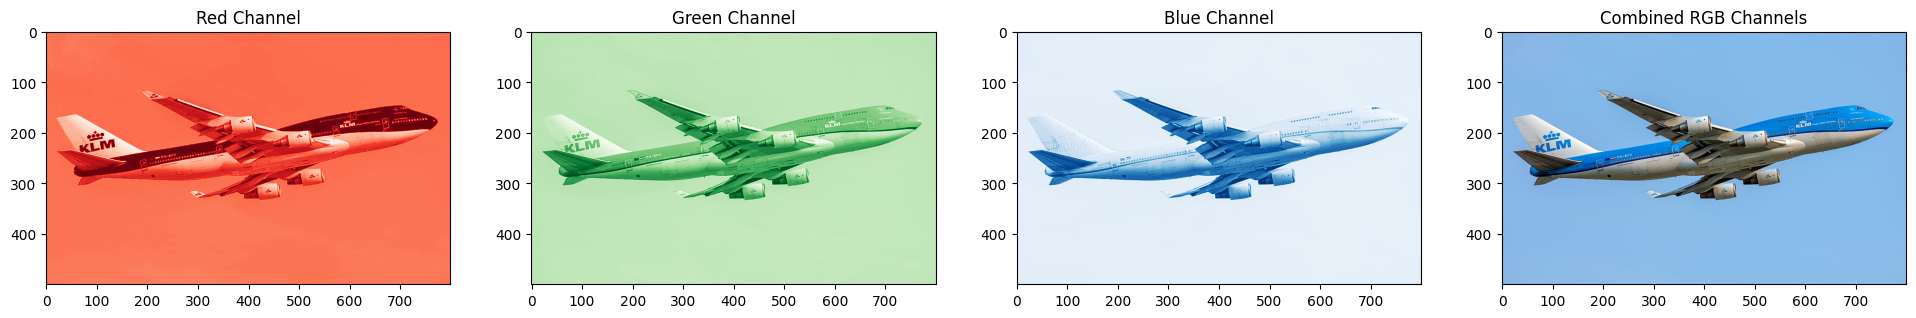

In [ ]:

red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]


order = 500
red_comp = svd_compressor(red_image, order)
green_comp = svd_compressor(green_image, order)
blue_comp = svd_compressor(blue_image, order)

color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
color_comp[:, :, 0] = red_comp
color_comp[:, :, 1] = green_comp
color_comp[:, :, 2] = blue_comp
color_comp = np.around(color_comp).astype(int)

plt.figure(figsize=(24, 8))
plt.subplot(141)
plt.imshow(red_comp, cmap='Reds_r')
plt.title("Red Channel")
plt.subplot(142)
plt.imshow(green_comp, cmap='Greens_r')
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(blue_comp, cmap='Blues_r')
plt.title("Blue Channel")
plt.subplot(144)
plt.imshow(color_comp)
plt.title("Combined RGB Channels")
plt.show()